In [ ]:
import json

import polars as pl
import geopandas as gpd

%load_ext autoreload
%autoreload 2

: 

In [3]:
with open("data/classes.json", "r") as fp:
    class_mapping = json.load(fp)

# removing comments in parantheses
short_superclass_mapping = {k: v.split(" (")[0] for k, v in class_mapping.items()}
short_class_mapping = {k: f"{v.split(' (')[0]} ({k})" for k, v in class_mapping.items()}

In [4]:
samples = gpd.read_parquet("data/samples.parquet")
samples

,sample_id,original_sample_id,interpreter,dataset,source,source_description,s2_tile,cluster_id,cluster_description,comment,confidence,geometry
0,0,0,pum,Evoland,EFFIS,"Evoland Project, EFFIS Source of Wildfire Poly...",30SUF,0.0,Damage polygons,leichte Durchforstung 2021,high,POINT (-4.12212 36.74179)
1,1,1,pum,Evoland,EFFIS,"Evoland Project, EFFIS Source of Wildfire Poly...",30SUF,1.0,Damage polygons,"Durchforstung_2021, kein Change erkennbar",high,POINT (-4.12161 36.74231)
2,2,2,pum,Evoland,EFFIS,"Evoland Project, EFFIS Source of Wildfire Poly...",30SUF,2.0,Damage polygons,"Durchforstung_2021, kein Change erkennbar",high,POINT (-4.1192 36.74203)
3,3,3,pum,Evoland,EFFIS,"Evoland Project, EFFIS Source of Wildfire Poly...",30SUF,3.0,Damage polygons,"Durchforstung 2021, unsicher",high,POINT (-4.12845 36.75831)
4,4,4,pum,Evoland,EFFIS,"Evoland Project, EFFIS Source of Wildfire Poly...",30SUF,5.0,Damage polygons,"Durchforstung 2021, starke Durchforstung",high,POINT (-4.12816 36.75908)
...,...,...,...,...,...,...,...,...,...,...,...,...
4295,4295,14414,vij,Windthrow,FORWIND + Copernicus Emergency Service,https://mapping.emergency.copernicus.eu/activa...,<NA>,LV20220807,"Id of the Event, given as ISO2 + Date of storm",<NA>,high,POINT (26.1231 56.51315)
4296,4296,14172,vij,Windthrow,FORWIND + Copernicus Emergency Service,https://mapping.emergency.copernicus.eu/activa...,<NA>,LV20220807,"Id of the Event, given as ISO2 + Date of storm",<NA>,high,POINT (26.27588 57.06756)
4298,4298,15954,vij,Windthrow,FORWIND + Copernicus Emergency Service,https://mapping.emergency.copernicus.eu/activa...,<NA>,LV20220807,"Id of the Event, given as ISO2 + Date of storm",might have bark beet,medium,POINT (23.44004 56.5117)
4300,4300,14519,vij,Windthrow,FORWIND + Copernicus Emergency Service,https://mapping.emergency.copernicus.eu/activa...,<NA>,LV20220807,"Id of the Event, given as ISO2 + Date of storm",small scale,medium,POINT (26.21896 56.99972)


In [6]:
labels = pl.read_parquet("data/labels.parquet")
labels

original_sample_id,dataset,label,original_label,start,end,sample_id,start_next_label
i64,str,str,str,"datetime[ms, UTC]","datetime[ms, UTC]",u64,"datetime[ms, UTC]"
2,"""Evoland""","""110""","""gesund""",2019-01-09 11:11:03 UTC,2022-04-01 00:00:00 UTC,2,2022-04-08 11:11:05 UTC
2,"""Evoland""","""212""","""durchforstung""",2022-04-08 11:11:05 UTC,2022-12-29 11:11:07 UTC,2,null
3,"""Evoland""","""110""","""gesund""",2019-01-09 11:11:03 UTC,2022-05-01 00:00:00 UTC,3,2022-05-08 11:11:05 UTC
3,"""Evoland""","""212""","""durchforstung""",2022-05-08 11:11:05 UTC,2022-12-29 11:11:07 UTC,3,null
4,"""Evoland""","""110""","""gesund""",2019-01-09 11:11:03 UTC,2020-05-03 11:11:11 UTC,4,2020-05-08 11:11:06 UTC
…,…,…,…,…,…,…,…
14519,"""Windthrow""","""110""","""0""",2017-05-30 00:00:00 UTC,2023-07-28 00:00:00 UTC,4300,2024-04-20 00:00:00 UTC
14519,"""Windthrow""","""220""","""a""",2024-04-20 00:00:00 UTC,2024-04-20 23:59:59 UTC,4300,null
14629,"""Windthrow""","""110""","""0""",2017-03-16 00:00:00 UTC,2023-08-07 00:00:00 UTC,4302,2023-08-17 00:00:00 UTC


In [7]:
superclass_enum = pl.Enum(["110", "120", "210", "220", "230", "240"])
superclass_str_enum = pl.Enum(
    ["Mature Forest", "Revegetation", "Planned", "Salvage", "Biotic", "Abiotic"]
)
low_level_class_enum = pl.Enum(reversed(short_class_mapping.values()))
unique_events = (
    labels.unique(["original_sample_id", "label"])
    .filter(~pl.col.label.is_in(["999"]))
    .with_columns(superclass=(pl.col.label.str.slice(0, 2) + pl.lit("0")))
    .with_columns(
        pl.col.superclass.replace(
            short_superclass_mapping, return_dtype=superclass_str_enum
        ).alias("biggroup"),
        pl.col.label.replace(
            short_class_mapping, return_dtype=low_level_class_enum
        ).alias("label_str"),
    )
)
unique_events

C:\Users\Jonas.Viehweger\AppData\Local\Temp\ipykernel_21712\3496868334.py:14: DeprecationWarning: the `return_dtype` parameter for `replace` is deprecated. Use `replace_strict` instead to set a return data type while replacing values.
(Deprecated in version 1.0.0)
C:\Users\Jonas.Viehweger\AppData\Local\Temp\ipykernel_21712\3496868334.py:15: DeprecationWarning: the `return_dtype` parameter for `replace` is deprecated. Use `replace_strict` instead to set a return data type while replacing values.
(Deprecated in version 1.0.0)


original_sample_id,dataset,label,original_label,start,end,sample_id,start_next_label,superclass,biggroup,label_str
i64,str,str,str,"datetime[ms, UTC]","datetime[ms, UTC]",u64,"datetime[ms, UTC]",str,enum,enum
912,"""Evoland""","""221""","""teilraeumung""",2020-03-17 10:26:30 UTC,2021-11-10 10:36:29 UTC,725,null,"""220""","""Salvage""","""After Biotic Disturbance (221)"""
416,"""Evoland""","""110""","""gesund""",2015-08-19 10:30:28 UTC,2018-08-31 10:40:13 UTC,410,2018-09-02 10:30:20 UTC,"""110""","""Mature Forest""","""Mature Forest (110)"""
1218,"""Evoland""","""244""","""sturm""",2018-10-04 10:20:18 UTC,2019-02-23 10:16:37 UTC,956,2019-03-20 10:16:40 UTC,"""240""","""Abiotic""","""Wind (244)"""
817,"""Evoland""","""110""","""gesund""",2015-08-06 10:20:12 UTC,2017-10-19 10:20:55 UTC,665,2018-02-01 10:22:37 UTC,"""110""","""Mature Forest""","""Mature Forest (110)"""
802,"""Windthrow""","""222""","""a""",2018-03-08 00:00:00 UTC,2018-03-08 23:59:59 UTC,3797,2018-08-05 00:00:00 UTC,"""220""","""Salvage""","""After Abiotic Disturbance (222…"
…,…,…,…,…,…,…,…,…,…,…
1526,"""HRVPP""","""120""","""3""",2020-04-01 00:00:00 UTC,2025-01-01 00:00:00 UTC,2531,null,"""120""","""Revegetation""","""Revegetation (120)"""
676,"""HRVPP""","""110""","""0""",2016-05-01 00:00:00 UTC,2025-01-01 00:00:00 UTC,1681,null,"""110""","""Mature Forest""","""Mature Forest (110)"""
758,"""Evoland""","""122""","""erholung""",2019-08-18 10:37:01 UTC,2021-11-10 10:36:58 UTC,631,null,"""120""","""Revegetation""","""Canopy closing (122)"""


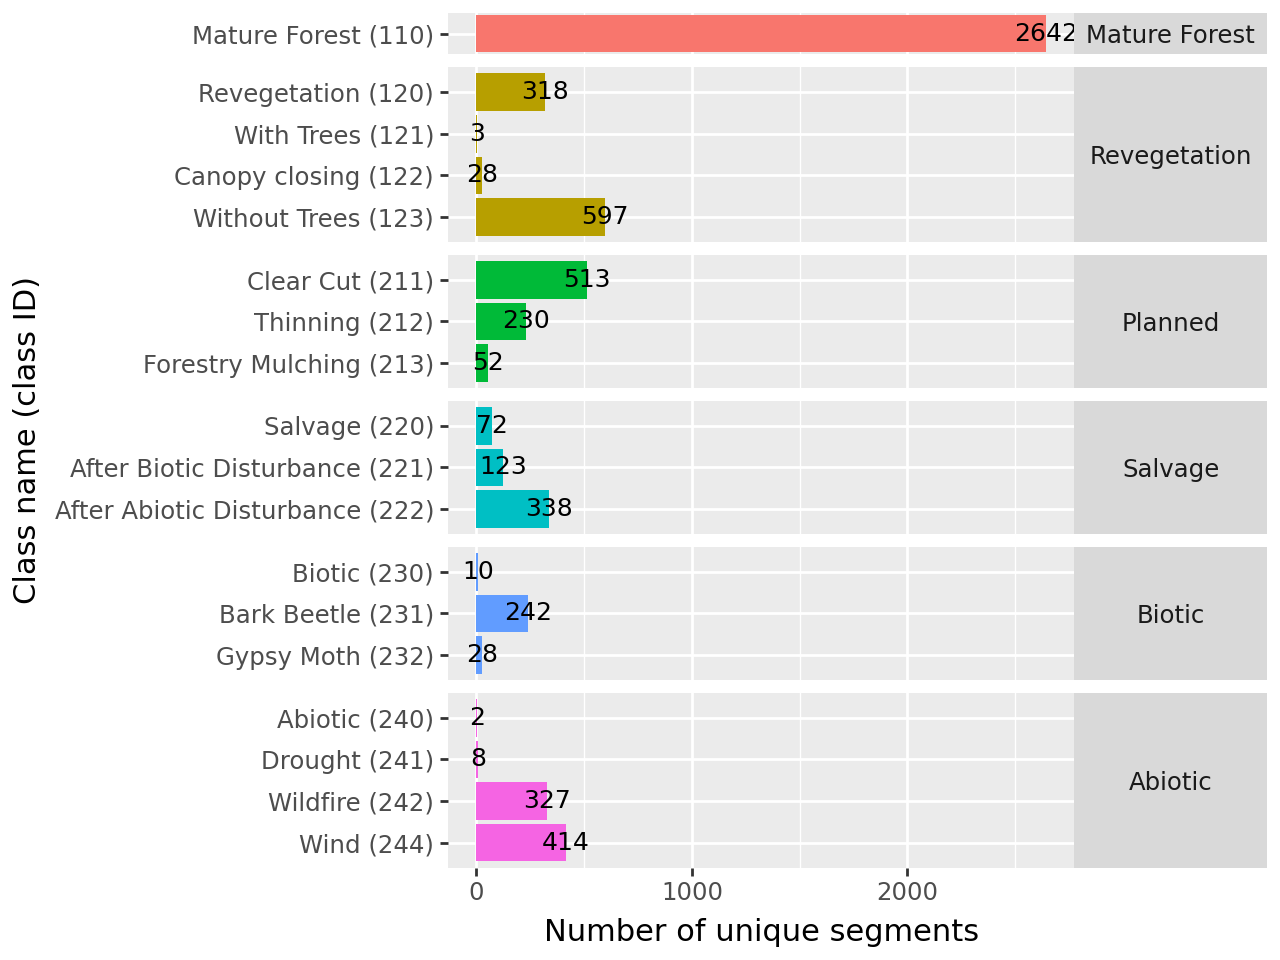

In [8]:
from plotnine import (
    ggplot,
    aes,
    geom_bar,
    labs,
    facet_grid,
    geom_text,
    after_stat,
    coord_flip,
    theme,
    element_text,
)

(
    ggplot(unique_events, aes(x="label_str", fill="biggroup"))
    + geom_bar(show_legend=False)
    + coord_flip()
    + geom_text(
        aes(label=after_stat("count"), group=1),
        stat="count",
        va="center",
        size=9,
    )
    + facet_grid(rows="biggroup", scales="free_y", space="free_y")
    + theme(
        strip_text_y=element_text(angle=0),  # change facet text angle
    )
    + labs(y="Number of unique segments", x="Class name (class ID)")
)

In [9]:
unique_events

original_sample_id,dataset,label,original_label,start,end,sample_id,start_next_label,superclass,biggroup,label_str
i64,str,str,str,"datetime[ms, UTC]","datetime[ms, UTC]",u64,"datetime[ms, UTC]",str,enum,enum
912,"""Evoland""","""221""","""teilraeumung""",2020-03-17 10:26:30 UTC,2021-11-10 10:36:29 UTC,725,null,"""220""","""Salvage""","""After Biotic Disturbance (221)"""
416,"""Evoland""","""110""","""gesund""",2015-08-19 10:30:28 UTC,2018-08-31 10:40:13 UTC,410,2018-09-02 10:30:20 UTC,"""110""","""Mature Forest""","""Mature Forest (110)"""
1218,"""Evoland""","""244""","""sturm""",2018-10-04 10:20:18 UTC,2019-02-23 10:16:37 UTC,956,2019-03-20 10:16:40 UTC,"""240""","""Abiotic""","""Wind (244)"""
817,"""Evoland""","""110""","""gesund""",2015-08-06 10:20:12 UTC,2017-10-19 10:20:55 UTC,665,2018-02-01 10:22:37 UTC,"""110""","""Mature Forest""","""Mature Forest (110)"""
802,"""Windthrow""","""222""","""a""",2018-03-08 00:00:00 UTC,2018-03-08 23:59:59 UTC,3797,2018-08-05 00:00:00 UTC,"""220""","""Salvage""","""After Abiotic Disturbance (222…"
…,…,…,…,…,…,…,…,…,…,…
1526,"""HRVPP""","""120""","""3""",2020-04-01 00:00:00 UTC,2025-01-01 00:00:00 UTC,2531,null,"""120""","""Revegetation""","""Revegetation (120)"""
676,"""HRVPP""","""110""","""0""",2016-05-01 00:00:00 UTC,2025-01-01 00:00:00 UTC,1681,null,"""110""","""Mature Forest""","""Mature Forest (110)"""
758,"""Evoland""","""122""","""erholung""",2019-08-18 10:37:01 UTC,2021-11-10 10:36:58 UTC,631,null,"""120""","""Revegetation""","""Canopy closing (122)"""


In [ ]:
from plotnine import ggplot, aes, geom_density

(
    ggplot(
        unique_events.with_columns(pl.col.start).filter(
            ~pl.col.biggroup.is_in(["Mature Forest", "Revegetation"])
        ),
        aes(x="start", color="biggroup", fill="biggroup"),
    )
    + geom_density(alpha=0.1, show_legend=False)
    # + scale_x_continuous(breaks=range(2015, 2026))
    + facet_grid(rows="biggroup")
    + theme(
        strip_text_y=element_text(angle=0),  # change facet text angle
    )
    + labs(x="Start year of unique segments", y="Count of events by start year")
)

TypeError: Discrete value supplied to continuous scale

In [10]:
from classification.dataloader import ZarrIterableDataset
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
labels.filter(pl.col.label.len().over("sample_id") > 3).unique("sample_id")

original_sample_id,dataset,label,original_label,start,end,sample_id,start_next_label
i64,str,str,str,"datetime[ms, UTC]","datetime[ms, UTC]",u64,"datetime[ms, UTC]"
15989,"""Windthrow""","""110""","""0""",2016-11-20 00:00:00 UTC,2021-11-14 00:00:00 UTC,4251,2022-01-20 00:00:00 UTC
1559,"""HRVPP""","""110""","""0""",2016-04-01 00:00:00 UTC,2019-11-16 00:00:00 UTC,2564,2020-03-16 00:00:00 UTC
5904,"""Windthrow""","""110""","""0""",2016-12-31 00:00:00 UTC,2017-12-18 00:00:00 UTC,3946,2018-02-14 00:00:00 UTC
675,"""Windthrow""","""110""","""0""",2016-11-22 00:00:00 UTC,2017-07-15 00:00:00 UTC,3811,2017-08-24 00:00:00 UTC
1925,"""HRVPP""","""110""","""0""",2016-05-01 00:00:00 UTC,2016-10-01 00:00:00 UTC,2930,2017-03-01 00:00:00 UTC
…,…,…,…,…,…,…,…
2039,"""Windthrow""","""110""","""0""",2016-11-18 00:00:00 UTC,2017-09-29 00:00:00 UTC,3881,2017-10-19 00:00:00 UTC
9504,"""Windthrow""","""110""","""0""",2016-11-15 00:00:00 UTC,2018-10-21 00:00:00 UTC,4048,2018-10-31 00:00:00 UTC
3144,"""Windthrow""","""110""","""0""",2016-12-02 00:00:00 UTC,2018-10-21 00:00:00 UTC,4074,2018-11-12 00:00:00 UTC


In [108]:
import datetime as dt

labels.filter(pl.col.label.len().over("sample_id") > 4).filter(
    pl.col.start > dt.date(year=2023, month=4, day=1), label="212"
).unique("sample_id")

original_sample_id,dataset,label,original_label,start,end,sample_id,start_next_label
i64,str,str,str,"datetime[ms, UTC]","datetime[ms, UTC]",u64,"datetime[ms, UTC]"
13936,"""Windthrow""","""212""","""6""",2023-04-09 00:00:00 UTC,2023-04-09 23:59:59 UTC,4293,2023-08-17 00:00:00 UTC


In [109]:
# sample_id = 3834  # good but a bit few mature samples, not good looking recovery
# sample_id = 2503
sample_id = 4293
labels.filter(sample_id=sample_id)

original_sample_id,dataset,label,original_label,start,end,sample_id,start_next_label
i64,str,str,str,"datetime[ms, UTC]","datetime[ms, UTC]",u64,"datetime[ms, UTC]"
13936,"""Windthrow""","""110""","""0""",2017-03-23 00:00:00 UTC,2022-12-17 00:00:00 UTC,4293,2023-04-09 00:00:00 UTC
13936,"""Windthrow""","""212""","""6""",2023-04-09 00:00:00 UTC,2023-04-09 23:59:59 UTC,4293,2023-08-17 00:00:00 UTC
13936,"""Windthrow""","""244""","""7""",2023-08-17 00:00:00 UTC,2023-08-17 23:59:59 UTC,4293,2024-03-06 00:00:00 UTC
13936,"""Windthrow""","""222""","""a""",2024-03-06 00:00:00 UTC,2024-03-06 23:59:59 UTC,4293,2024-04-28 00:00:00 UTC
13936,"""Windthrow""","""123""","""4""",2024-04-28 00:00:00 UTC,2024-12-04 00:00:00 UTC,4293,null


In [110]:
segments = labels.filter(sample_id=sample_id)

ds = ZarrIterableDataset(
    zarr_dir="data/chips",
    segment_sample=None,
    max_days_after_event=100000,
    chip_size=32,
)
stacked_data, labels_arr, timestamps = ds._open_zarr(sample_id, return_timestamps=True)
py_timestamps = [timestamp.date() for timestamp in timestamps]
ndmi = (
    stacked_data[:, 7, 16, 16].astype(np.int32)
    - stacked_data[:, 8, 16, 16].astype(np.int32)
) / (stacked_data[:, 7, 16, 16] + stacked_data[:, 8, 16, 16])
fully_segmented = segments.with_columns(pl.max_horizontal("start_next_label", "end"))

In [125]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# --- segment changes ---
segment_changes = np.concatenate(
    [np.array([0]), np.where(labels_arr[:-1] != labels_arr[1:])[0] + 1]
)

# --- build subplot specs ---
n_chips = len(segment_changes)
specs = [[{"type": "xy"} for _ in range(n_chips)]] + [
    [{"colspan": n_chips}, *[None] * (n_chips - 1)]
]

fig = make_subplots(
    rows=2,
    cols=n_chips,
    specs=specs,
    vertical_spacing=0.05,  # Reduced from 0.15
    horizontal_spacing=0.02,  # Added to reduce space between columns
    subplot_titles=[
        f"label: {labels_arr[i]}<br>date: {py_timestamps[i].strftime('%Y-%m-%d')}"
        for i in segment_changes
    ],
)

# --- Row 1: image chips ---
for j, i in enumerate(segment_changes):
    rgb = stacked_data[i + 1, [2, 1, 0], :, :]  # RGB
    image = np.rollaxis(rgb, 0, 3)
    image = np.clip(image / 2000, 0, 1)
    fig.add_trace(go.Image(z=(image * 255).astype(np.uint8)), row=1, col=j + 1)

# --- Row 2: NDMI timeline (full width) ---
fig.add_trace(
    go.Scatter(x=py_timestamps, y=ndmi, mode="lines", name="NDMI"), row=2, col=1
)

# --- Color map for labels ---
unique_labels = fully_segmented["label"].unique()
palette = px.colors.qualitative.T10
color_map = {lbl: palette[i % len(palette)] for i, lbl in enumerate(unique_labels)}

# --- Rectangles for segments ---
for _, row in fully_segmented.to_pandas().iterrows():
    fig.add_vrect(
        x0=row["start"],
        x1=row["start_next_label"],
        fillcolor=color_map[row["label"]],
        opacity=0.2,
        line_width=0,
        layer="below",
        row=2,
        col=1,
    )

# --- Layout tweaks ---
fig.update_layout(
    height=800,
    showlegend=False,
    margin=dict(l=20, r=20, t=60, b=20),  # Reduced margins
    title_font_size=12,  # Smaller title font
)

# Remove axis labels only from image subplots (row 1)
for j in range(n_chips):
    fig.update_xaxes(
        showticklabels=False,
        title_text="",
        showgrid=False,
        zeroline=False,
        row=1,
        col=j + 1,
    )
    fig.update_yaxes(
        showticklabels=False,
        title_text="",
        showgrid=False,
        zeroline=False,
        row=1,
        col=j + 1,
    )

# Keep axis labels for the timeline plot (row 2)
fig.update_yaxes(title_text="NDMI", row=2, col=1)

# Make subplot titles smaller
fig.update_annotations(font_size=10)

fig.write_image("timeline.png", scale=2, height=350)
fig.show()